# Universidad del Desarrollo
## Magister Data Science - Macroeconomía
### Grupo N°2: (Región de los Lagos)
* Jose Pedro
* Cristian
* Paul
* Max
* Hernan

## Analisis del archivo Canasta para la Region de los Lagos

**Objetivo**

El objetivo de este notebook es el analisis del archivo construido para el calculo de IPC


In [1]:
import pandas as pd
import matplotlib.colors as clr

%matplotlib inline

### 1. Se carga canasta de productos

In [2]:
df = pd.read_csv('output/rlagos_canasta.csv')

### 2. Se obtiene los datos relevantes para al analisis

In [3]:
df = df[["Momento", "Sector", "Tipo", "Producto", "Precio promedio"]]

In [4]:
df.head()

,Momento,Sector,Tipo,Producto,Precio promedio
0,2014-08,Osorno,Aceite,Maravilla,1558.2966
1,2014-08,Osorno,Aceite,Vegetal,1410.9042
2,2014-08,Puerto Montt,Aceite,Maravilla,1516.6203
3,2014-08,Puerto Montt,Aceite,Vegetal,1357.3113
4,2014-09,Frutillar,Aceite,Maravilla,1680.2222


### 3. Periodos minimo y maximo del dataset

In [5]:
df.Momento.min()

'2014-08'

In [6]:
df.Momento.max()

'2018-06'

* Se determina que el mes base para el estudio es el Agosto del 2018

### 4. Renombramos columnas con su concepto real.

In [7]:
df.rename(columns={'Producto': 'Variedad', 'Precio promedio': 'Promedio', 'Tipo': 'Producto'}, inplace=True)

In [8]:
df.head()

,Momento,Sector,Producto,Variedad,Promedio
0,2014-08,Osorno,Aceite,Maravilla,1558.2966
1,2014-08,Osorno,Aceite,Vegetal,1410.9042
2,2014-08,Puerto Montt,Aceite,Maravilla,1516.6203
3,2014-08,Puerto Montt,Aceite,Vegetal,1357.3113
4,2014-09,Frutillar,Aceite,Maravilla,1680.2222


### 5. Graficamos el nro de productos por sector 

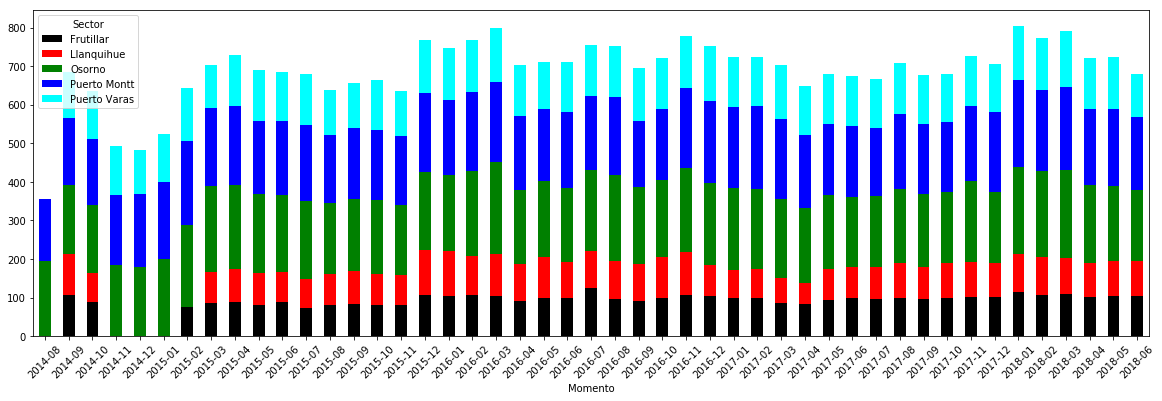

In [9]:
dx = df.groupby(["Momento", "Sector"])['Variedad'].size().unstack()

mycolor=['black', 'red', 'green', 'blue', 'cyan']

dx.plot(kind='bar', stacked=True, figsize=(20, 6), color=mycolor, rot=45)

* No existe simetria en la variedad de productos por sector
* Se identifica que en los primeros periodos no existen variedades para todos los sectores:
    - 2014/08
    - 2014/11
    - 2014/12
    - 2015/01
    - 2015/02

* Se tendra que imputar los valores que no se encuentren presentes para el calculo del IPC

### 5. Guardamos archivo.

In [11]:
df.to_csv('output/canasta_ipc.csv', index=False)